## Assignment: Titanic Dataset 
The Titanic dataset is a well-known dataset in the field of data science and machine learning. It contains information about the passengers who were on board the Titanic when it sank, including their age, gender, class, and whether or not they survived. The goal of this assignment is to prepare the Titanic dataset.

### Introduction
In this assignment, you will be working with the Titanic dataset, which contains information about passengers on the Titanic, including whether or not they survived. Your task is to preprocess the data, convert all data to numeric data for scikit-learn, and perform feature selection using the f_classif() function. Additionally, you will calculate the Pearson correlation coefficient between each pair of features in the dataset to identify any highly correlated features.

### Data Preprocessing
1. Load the Titanic dataset into a Pandas DataFrame. 
2. Check for missing values and fill them in appropriately.
3. Convert non-numeric data to numeric data using the get_dummies() function from Pandas. Be sure to exclude any columns that won't be used for analysis (e.g. PassengerId, Name, Ticket, Cabin).

### Feature Selection
1. Split the dataset as shown in the code below. 
2. Fit a decision tree classifier to the training set using the DecisionTreeClassifier() class from 
3. Calculate the f-score and p-values for each feature in the dataset using the f_classif() function from scikit-learn. Print out the f-score and p-value for each feature.
4. Calculate the Pearson correlation coefficient between each pair of features in the dataset using the corr() function from Pandas. Print out the correlation coefficient and the p-value for any pair of features that have a statistically significant correlation (p-value less than 0.05).

### Deliverables
A Jupyter notebook containing your code and comments.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from scipy.stats import pearsonr


In [35]:
# Load the Titanic Dateset
data = pd.read_csv('titanic.csv')

In [37]:
# Explore the dataset and identify any missing values using isnul().sum() 
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [39]:
# Fill in any missing values with appropriate values (e.g., mean or median values).
# using fillna() to fill the median() values for missing values for feature Age
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [41]:
# Apply one-hot encoding to non-numeric features (Sex and Embarked) usin gthe .get_dummies method

cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data = data.drop(cols_to_drop, axis=1)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [45]:
# Display top 10 lines from the dataset 

print("Top 10 rows after preprocessing:")
print(data.head(10))


Top 10 rows after preprocessing:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  33.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   
5         0       3  28.0      0      0   8.4583      True        True   
6         0       1  54.0      0      0  51.8625      True       False   
7         0       3   2.0      3      1  21.0750      True       False   
8         1       3  27.0      0      2  11.1333     False       False   
9         1       2  14.0      1      0  30.0708     False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
5       False  
6        True  
7        True  
8       

In [47]:
# Split the dataset into features (X) and label (y)
X = data.drop(['Survived'], axis=1)
y = data['Survived']

In [51]:
# Display X dataframe info() with features
print("X Feature info:")
print(X.info())


X Feature info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 37.5 KB
None


In [55]:
# Display Y dataframe info() with features
print("Y Feature info:")
print(y.info())


Y Feature info:
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB
None


In [57]:
# Calculate the F-scores and p-values for each numeric feature using f_classif()
f_scores, p_values = f_classif(X, y)

In [59]:
# Calculate the f-score and p-values for each feature in the dataset
print("\nFeature ANOVA F-scores and p-values:")
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature:20s} F-score: {f_scores[i]:.4f} P-value: {p_values[i]:.6f}")


Feature ANOVA F-scores and p-values:
Feature: Pclass               F-score: 115.0313 P-value: 0.000000
Feature: Age                  F-score: 3.8502 P-value: 0.050050
Feature: SibSp                F-score: 1.1106 P-value: 0.292244
Feature: Parch                F-score: 5.9635 P-value: 0.014799
Feature: Fare                 F-score: 63.0308 P-value: 0.000000
Feature: Sex_male             F-score: 372.4057 P-value: 0.000000
Feature: Embarked_Q           F-score: 0.0118 P-value: 0.913353
Feature: Embarked_S           F-score: 20.3745 P-value: 0.000007


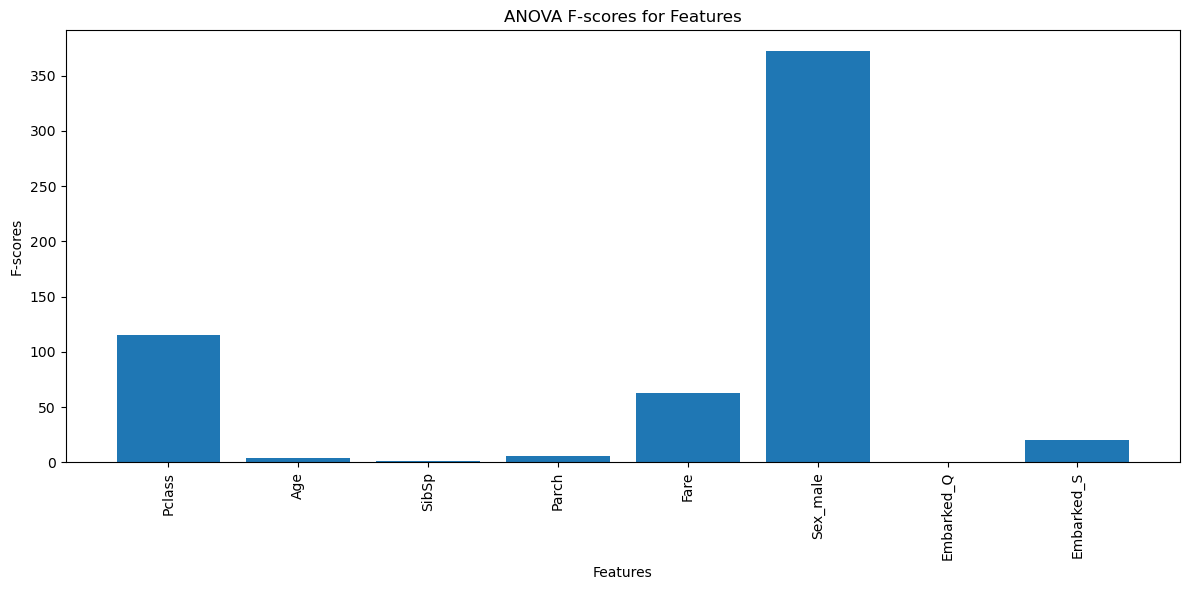

In [61]:
# Create a bar chart to visualize the F-scores for each numeric feature
# Change this code as needed
plt.figure(figsize=(12, 6))
plt.bar(X.columns, f_scores)
plt.title('ANOVA F-scores for Features')
plt.xlabel('Features')
plt.ylabel('F-scores')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


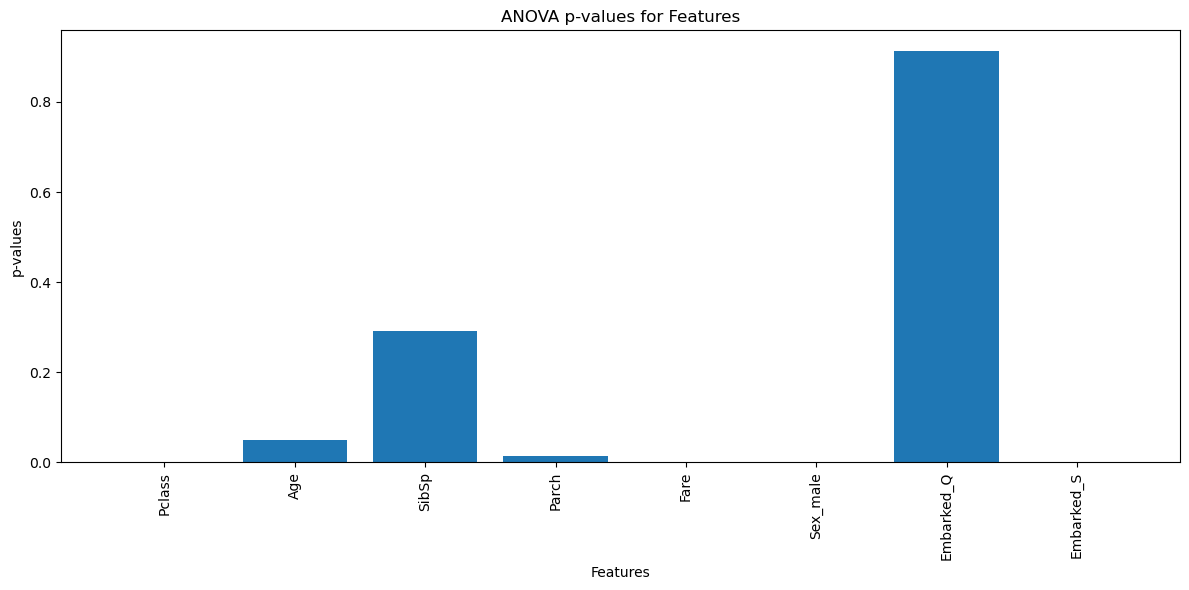

In [70]:
# Create a bar chart to visualize the p-values for each numeric feature
# Change this code as needed

plt.figure(figsize=(12, 6))
plt.bar(X.columns, p_values)
plt.title('ANOVA p-values for Features')
plt.xlabel('Features')
plt.ylabel('p-values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Analyze the results and write a a few lines discussing the following:

### Which numeric features have the highest F-scores? What does this indicate about their relationship with the target variable?


The features which have the highest F-scores are Sex-male and Pclass. What this indicates about thier relationship to Survied is that these two features strongly discriminate between 0 and 1, Not Survived and Survived, which tells us how well they help predict whether a passenger survived or not.

### Which numeric features have the lowest p-values? What does this indicate about their significance?


The features which have the lowest p-values are Pclass, Fare, Sex_male , and Embarked_S. What this indicates is that there is a statistically significant relationship between those features and whether or not a passenger survived. 

### Based on your analysis, which numeric features do you think are the most important for predicting the target variable?

Based on my analysis, the numeric features which are most important for predicting whether or not a passenger survived are Sex_Male, Pclass, and Fare.

## Calculate the f-score and p-values for each feature in the dataset
### Analyze the results and write a a few lines discussing the findings

In [88]:

f_score, p_value = f_classif(X, y)
for i, col in enumerate(X.columns):
    print(f"{col} - f-score: {f_score[i]}, p-value: {p_value[i]}")



Pclass - f-score: 115.03127218827744, p-value: 2.537047387979699e-25
Age - f-score: 3.850248832072658, p-value: 0.050050216267598986
SibSp - f-score: 1.1105722041132329, p-value: 0.29224392869817906
Parch - f-score: 5.963463836603494, p-value: 0.0147992453747224
Fare - f-score: 63.03076422804438, p-value: 6.120189341922221e-15
Sex_male - f-score: 372.40572360221483, p-value: 1.406066130879597e-69
Embarked_Q - f-score: 0.011846343990383331, p-value: 0.9133532352434973
Embarked_S - f-score: 20.374459882803, p-value: 7.223240983686276e-06


Based on the fact that the strongest predictions of survival on the Titanic have high f-scores and low p-values, I would conclude that Sex_male, Pclass, and Fare are the most important features. SibSp and Embarked_Q are not significant (high p-values), meaning they do not have a strong relationship with survival in this dataset. In future modeling, 

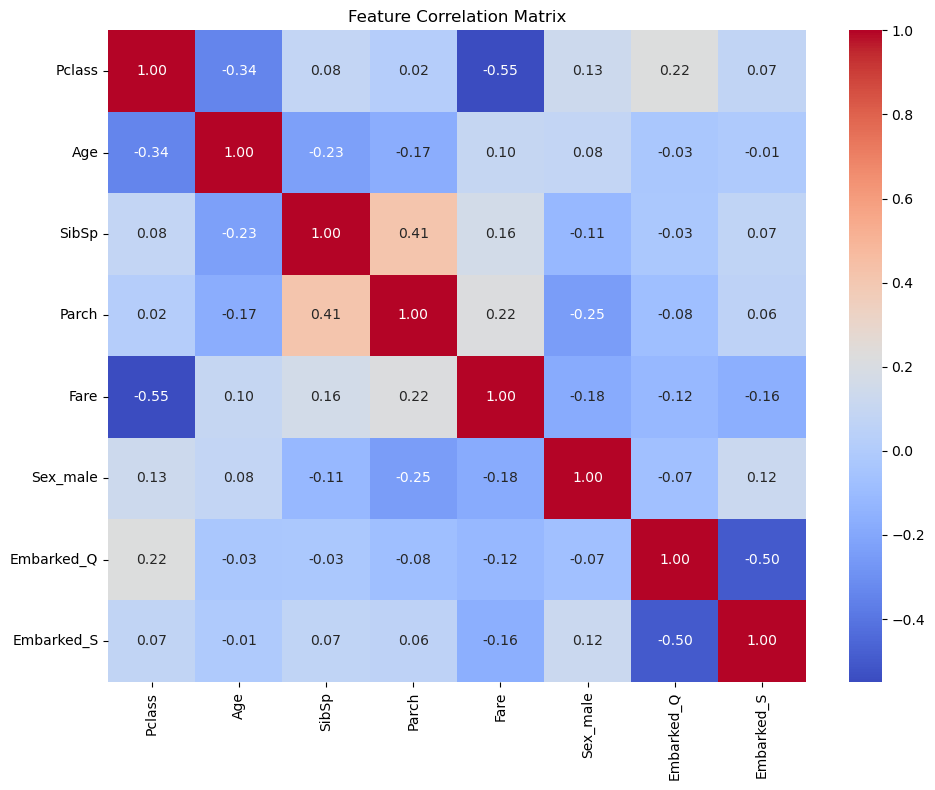

In [67]:
# Calculate the Pearson correlation coefficient between each pair of features in the dataset
# Use the .corr() method
corr_matrix = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()